## **step 1: READING PDF FILES**




**pyMuPDF Package installation**

In [34]:
# pyMuPDF used for read file such as pdf,xps files
! pip install pyMuPDf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# fitz used for change meta-information of the file 
import fitz

In [36]:
# open the pdf file
pdf=fitz.open('pinnacle_inv_2020000032.pdf')


In [37]:
# converting pdf file into jpg for easy usage 
page=pdf.load_page(0)  # here load_page(0) is used means this pdf contain only one page so we start with 0
pix=page.get_pixmap()  # jpg convertion
image=pix.save('output.jpg') # save the file 

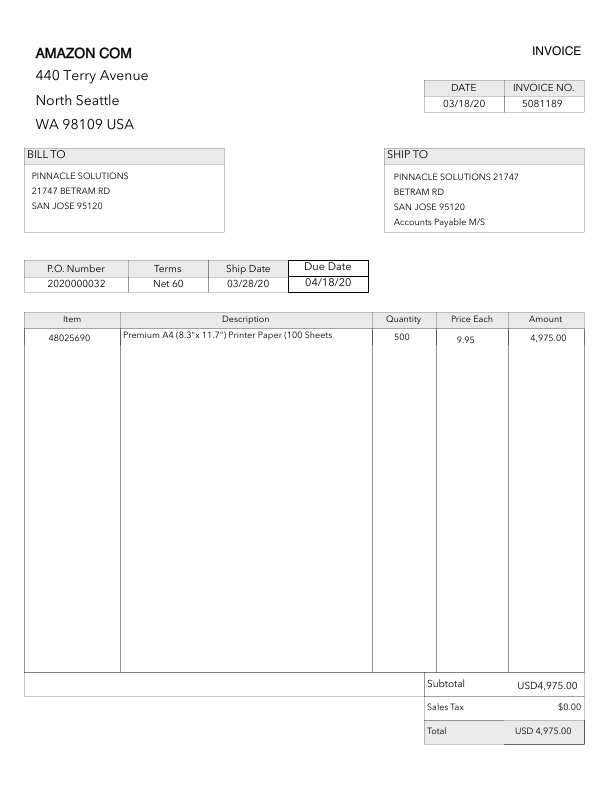

In [38]:
# PIL stands for pilow used for opening image file
import PIL
from PIL import ImageDraw
image=PIL.Image.open('output.jpg')
image

## **STEP 2: Extract Keywords Using EasyOCR** 

**Package installation EasyOCR**

In [39]:
# firt of all OCR stands for Optical Character Regconition
# Easy ocr is used for converting image into text
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import easyocr 
# create reader to do easy ocr
# we run code with cpu.so enter gpu is false
reader=easyocr.Reader(['en'],gpu=False) # en means langugae english

In [41]:
# read the image using reader
bounds=reader.readtext('output.jpg')
bounds

[([[35, 43], [135, 43], [135, 63], [35, 63]],
  'AMAZON COM',
  0.9988168722565308),
 ([[531, 45], [583, 45], [583, 59], [531, 59]], 'INVOICE', 0.9992494417088656),
 ([[35, 66], [151, 66], [151, 85], [35, 85]],
  '440 Terry Avenue',
  0.9325177236008292),
 ([[450, 84], [476, 84], [476, 92], [450, 92]], 'DATE', 0.958904504776001),
 ([[511, 81], [573, 81], [573, 93], [511, 93]],
  'INVOICE NO',
  0.9339992960524247),
 ([[35, 93], [123, 93], [123, 109], [35, 109]],
  'North Seattle',
  0.958711542604084),
 ([[441, 97], [489, 97], [489, 111], [441, 111]],
  '03/18/20',
  0.9796144000355641),
 ([[521, 97], [565, 97], [565, 111], [521, 111]],
  '5081189',
  0.9545548970567811),
 ([[35, 117], [135, 117], [135, 133], [35, 133]],
  'WA 98109 USA',
  0.9761576319103651),
 ([[25, 147], [69, 147], [69, 161], [25, 161]], 'BILL TO', 0.942633231130635),
 ([[385, 149], [431, 149], [431, 161], [385, 161]],
  'SHIPTO',
  0.9543715291175949),
 ([[31, 171], [131, 171], [131, 183], [31, 183]],
  'FINNACLE 

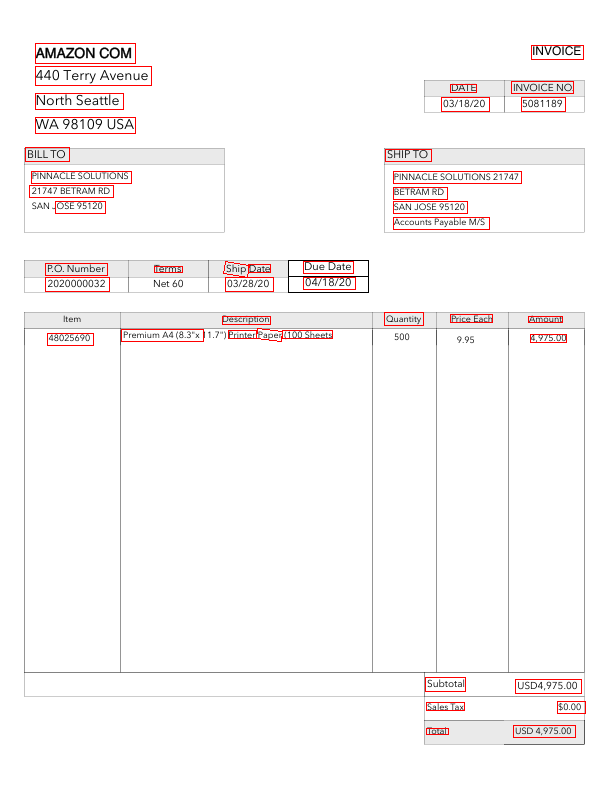

In [42]:
# this cell uses for word indication from image
from skimage import img_as_bool
def drawboxes(image,bounds,color='red',width=1):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]  # p0,p1,p2,p3 means dimention of indication box
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  return image

drawboxes(image,bounds)




In [43]:
print(len(bounds))

42


In [44]:
# avoid unwanted numeric number from bounds and only getting keywords
for i in bounds:
  text=(i[1])
  print(text)

AMAZON COM
INVOICE
440 Terry Avenue
DATE
INVOICE NO
North Seattle
03/18/20
5081189
WA 98109 USA
BILL TO
SHIPTO
FINNACLE SOLUTIONS
PINNACLE SOLUTICNS 21747
21747 BETRAM RD
BETRAMRD
IOSE 95120
SAN JOSE 95120
Azcounts Payable MS
RONumber
efms
Date
Due Date
202000C032
03/28/20
04/18/20
Dermpon
Quaritity
Ric Fac
Umndunl
48025690
Prernium 44(8.3 *
Printet
Iob Shee
4#{S.Ol
Subtotal
USDA,975.00
CeTax
S0.CJ
Hdiai
USD 4,975.00
Ship
Papet


## **STEP 3 : Keyword Extraction Using Regex**

In [45]:
# regex stands for regular expression 
# simply say regex is used for searching pattern
#  regex is a sequence of characters that forms a search pattern
import re 

In [46]:
# here we want to extract invoice no .invoice no must be 7 or 8 charcters so we use comment [0-9]{7} 7 means run 7 times
invoice_pattern = re.compile('([0-9]{7})')
invoice_no=[]
for i in bounds:
  text=(i[1])
  if invoice_pattern.match(text):
   print(text)
   invoice_no.append(text) # value is append to empty list

5081189
48025690


In [47]:
# date must be dd\mm\yy in this fomat so we use {2} for 2 tym run 
date_pattern=re.compile('[0-9]{2}\/[0-9]{2}\/[0-9]{2}')
shipdate_and_duedate=[]
for i in bounds:
  text=(i[1])
  if date_pattern.match(text):
   print(text)
   shipdate_and_duedate.append(text)


03/18/20
03/28/20
04/18/20


In [48]:
# we split address in3 form because address present in 3 condition
address_pattern1=re.compile('[0-9]{3}\s[a-zA-Z]{5}\s[a-zA-Z]{6}') 
address_pattern2=re.compile('[a-zA-Z]{5}\s[a-zA-Z]{7}')
address_pattern3=re.compile('[A-Z]{2}\s\d{5}\s[A-Z]{3}')


address=[]
for i in bounds:
  text=(i[1])
  if address_pattern1.match(text):
   print(text)
   address.append(text)
  
  if address_pattern2.match(text):
    address.append(text)

  if address_pattern3.match(text):
    address.append(text)



440 Terry Avenue


In [49]:
# PO pattern as well as ame like number series 
po_pattern=re.compile('[0-9]{6}[A-Z]{1}[0-9]{3}') #  here one error this pdf consider 0 as C so can't find po number that y i use [A-Z]

po_number=[]
for i in bounds:
  text=(i[1])
  if po_pattern.match(text):
   print(text)
   po_number.append(text)

202000C032


In [50]:
amount_pattern=re.compile('[A-Z]{3}\s[0-9]{1}\,[0-9]{3}\.\d{2}') #\s usesd for gap determination
amount=[]
for i in bounds:
  text=(i[1])
  if amount_pattern.match(text):
   print(text)
   amount.append(text)

USD 4,975.00


In [51]:
#\d is short form of [0-9]
item_pattern=re.compile('\d{8}')
item_no=[]
for i in bounds:
  text=(i[1])
  if item_pattern.match(text):
   print(text)
   item_no.append(text)

48025690


In [52]:
total_pattern=re.compile('[A-Z]{3}\s[0-9]{1}\,[0-9]{3}\.\d{2}')
total_amount=[]
for i in bounds:
  text=(i[1])
  if total_pattern.match(text):
   print(text)
   total_amount.append(text)

USD 4,975.00


## **Final result**

In [53]:
import pandas as pd
data={'INVOICE NO':invoice_no,
      'SHIPDATE AND DUE DATE':shipdate_and_duedate,
      'ITEM NO':item_no,
      'ADDRESS':address,
      'PO NUMBER':po_number,
      'PRODUCT PRICE':amount,
      'TOTAL AMOUNT':total_amount}
data

{'INVOICE NO': ['5081189', '48025690'],
 'SHIPDATE AND DUE DATE': ['03/18/20', '03/28/20', '04/18/20'],
 'ITEM NO': ['48025690'],
 'ADDRESS': ['440 Terry Avenue', 'North Seattle', 'WA 98109 USA'],
 'PO NUMBER': ['202000C032'],
 'PRODUCT PRICE': ['USD 4,975.00'],
 'TOTAL AMOUNT': ['USD 4,975.00']}

# STEP 4 : Find Keyword Automatically for any PDF

**Package installation : rake_nltk**

RAPID AUTOMATIC KEYWORD EXTRACTION ALGORITHM

In [58]:
# RAKE short for Rapid Automatic Keyword Extraction algorithm
# used for automatic keyword Extraction

!pip install rake_nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
# nltk means natural langugae toolkit used for analysing 
import nltk
nltk.download('punkt') # for tokenization purpose 
nltk.download('stopwords') # avoid unwanted words like a ,an ,the

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:

# importing rake 
from rake_nltk import Rake

In [65]:
extract_words=[]
for i in bounds:
  text=i[1]
  extract_words.append(text)

# here bounds is in list format...rake only applicalbe if the type is string
s=extract_words
#using list comprehension
listToStr = ' '.join(map(str, s))
 
print(listToStr)
r = Rake()
r.extract_keywords_from_text(listToStr)

AMAZON COM INVOICE 440 Terry Avenue DATE INVOICE NO North Seattle 03/18/20 5081189 WA 98109 USA BILL TO SHIPTO FINNACLE SOLUTIONS PINNACLE SOLUTICNS 21747 21747 BETRAM RD BETRAMRD IOSE 95120 SAN JOSE 95120 Azcounts Payable MS RONumber efms Date Due Date 202000C032 03/28/20 04/18/20 Dermpon Quaritity Ric Fac Umndunl 48025690 Prernium 44(8.3 * Printet Iob Shee 4#{S.Ol Subtotal USDA,975.00 CeTax S0.CJ Hdiai USD 4,975.00 Ship Papet


In [66]:
# get value with phrase code
r.get_ranked_phrases_with_scores()


[(602.6666666666667,
  'shipto finnacle solutions pinnacle soluticns 21747 21747 betram rd betramrd iose 95120 san jose 95120 azcounts payable ms ronumber efms date due date 202000c032 03'),
 (77.66666666666667,
  '20 dermpon quaritity ric fac umndunl 48025690 prernium 44'),
 (75.33333333333333, 'amazon com invoice 440 terry avenue date invoice'),
 (35.66666666666667, '20 5081189 wa 98109 usa bill'),
 (24.5, 'printet iob shee 4 #{'),
 (20.0, 'north seattle 03'),
 (16.5, 'cj hdiai usd 4'),
 (9.0, 'ol subtotal usda'),
 (9.0, '00 ship papet'),
 (9.0, '00 cetax s0'),
 (7.666666666666667, '20 04'),
 (1.0, '975'),
 (1.0, '975'),
 (1.0, '8'),
 (1.0, '3'),
 (1.0, '28'),
 (1.0, '18'),
 (1.0, '18')]

In [67]:
# extraction
for rank,keyword in r.get_ranked_phrases_with_scores():

    if rank <76: # here 76 used depends on phrase score
        print(keyword)
 # output might be slight different.if we use paragaraphic pdf it's gives more accuracy...

amazon com invoice 440 terry avenue date invoice
20 5081189 wa 98109 usa bill
printet iob shee 4 #{
north seattle 03
cj hdiai usd 4
ol subtotal usda
00 ship papet
00 cetax s0
20 04
975
975
8
3
28
18
18


## **REFERENCES**

https://www.youtube.com/watch?v=9RksQ5YT7FM

https://github.com/AndroidArena/EasyOCR/blob/master/EasyOCRDemo.ipynb


https://www.youtube.com/watch?v=O43XPHC_DEs